## Partie 1 : PageRank - version itérative, premier exemple

##### 1. Justifier pourquoi l’algorithme de la puissance iterérée permet de calculer le score de chacune des pages. 

Dans un premier temps il faut que la matrice symbolysant le web soit une matrice stochastique, c'est une matrice de probabilité ou la somme de chaque colonne doit être égal à 1, elle traduit la probabilité de se rendre sur une autre page depuis la page courante. En appliquant l'algorythme de puissance itértée sur celle-ci on obtient des vecteurs propre pour chaque point de la matrice. Ces vecteurs nous donne la probabilité de se retrouvé sur une page apres tant d'itération. Plus sa valeur est grande plus la page est fréquemment visité au cour des itérations.    



In [126]:
from random import randint
import numpy as np
from math import sqrt

In [127]:
#fonction pour la norme
def norme(X:np.array):
    sum = 0 
    for x in X:
        sum += x**2
    return np.sqrt(sum)

V = np.array([2,0,0,3])
print(norme(V))

3.605551275463989


In [128]:

def puissanceItere(l,A:np.array):
   """Fonction qui applique l'algorithme de puissance itérée sur une matrice. 
   Matrice de toutes tailles, stochastique ou non"""
   X = np.array([randint(1,10) for x in range (A.shape[0])])
   Lambda = 0
   while (True):
       aLambda = Lambda
       AX = np.dot(A,X) # approximation du vecteur propre associé
       Lambda = norme(AX) # approximation de lambda
       X = AX / Lambda
       if (abs(Lambda - aLambda) < l ):
           return X,Lambda


C2 = np.array([[2, 3], [1, 0]])
X, Lambda = puissanceItere(1e-6, C2)
print("Vecteur propre approximé :", X)
print("Valeur propre approximée :", Lambda)
print("--------------------------------------")
C3 = np.array([[4,1,0], [1,3,1], [0,1,2]])
X, Lambda = puissanceItere(1e-6, C3)
print("Vecteur propre approximé :", X)
print("Valeur propre approximée :", Lambda)
print("--------------------------------------")
C4 = np.array([[4, 1, 0, 0],[1, 3, 1, 0],[0, 1, 2, 1],[0, 0, 1, 1]])
X, Lambda = puissanceItere(1e-6, C4)
print("Vecteur propre approximé :", X)
print("Valeur propre approximée :", Lambda)

Vecteur propre approximé : [0.94868331 0.31622773]
Valeur propre approximée : 3.000000234164173
--------------------------------------
Vecteur propre approximé : [0.78851001 0.57751534 0.21148995]
Valeur propre approximée : 4.732050519693263
--------------------------------------
Vecteur propre approximé : [0.77772234 0.5799796  0.23421086 0.06258519]
Valeur propre approximée : 4.745280743722432


##### 2. Implementer cet algorithme pour calculer le score de chacune des pages du graphe precedent. On verifiera que le vecteur de score obtenu est bien approximativement solution de r = Qr.


In [129]:
def stocastique (C:np.array) -> np.array:
    """renvoi la matice stocastique de C"""
    sum_col = C.sum(axis=0)     #somme des colonne dans un tableau
    sum_col[sum_col == 0] = 1   #si la somme vaut 0 on remplace par 1 pour eviter la division par 0 
    Q = C/sum_col               #divison de chaque valeur pas la somme de sa colonne
    return Q


In [130]:
def score(C:np.array,precision):
    Q = stocastique(C)
    #print ("C : ","\n",C)
    #print ("Q : ","\n",Q)
    r = np.array([1/C.shape[0] for i in range(C.shape[0])])
    while (True):
        r_copie = r
        r = np.dot(Q,r) # approximation du vecteur propre associé
        if ( np.allclose(r_copie, r, atol=precision)):
            return r
        


C = np.array([
    [0,1,1,1,1,0,1,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,1,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,1,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,1,1,1,1],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,1,0,0],
    [0,0,0,0,0,0,0,0,0,1,1,0,1,0]
])

t = score (C,1e-6)
for i in range (len(t)):
    print (i+1,": ",t[i])

1 :  0.13761783539830247
2 :  0.027523733949253455
3 :  0.03669838652216148
4 :  0.04587309429687282
5 :  0.059635154836846296
6 :  0.16513143092381713
7 :  0.05504320270122657
8 :  0.11008575366685683
9 :  0.05504320270122657
10 :  0.13761783539830247
11 :  0.02752373394925345
12 :  0.03669838652216147
13 :  0.04587309429687281
14 :  0.05963515483684628


##### 3. Analyser la pertinence du resultat obtenu.
Pour verifier mes resultats, étant donné que les vecteurs obtenue traduisent une probabilité il faut que la somme global soit d'environ 1. C'est le cas ce qui me laisse penser que les resultats sont corrects.
Ici on obtient le score de chaque noeuds (pages), on voit que le noeud 6 est celui avec le meilleur score ce sera donc la page la mieux classé par PageRank. Elle a le meilleur score car elle est celle vers qui les liens pointe le plus. L'importance de ses enfants lui donne la plus grand importance global.

## Partie 2 : PageRank - version itérative, deuxième exemple

##### 1. Appliquer l’algorithme de la Partie 1 au graphe suivant et commenter le resultat obtenu
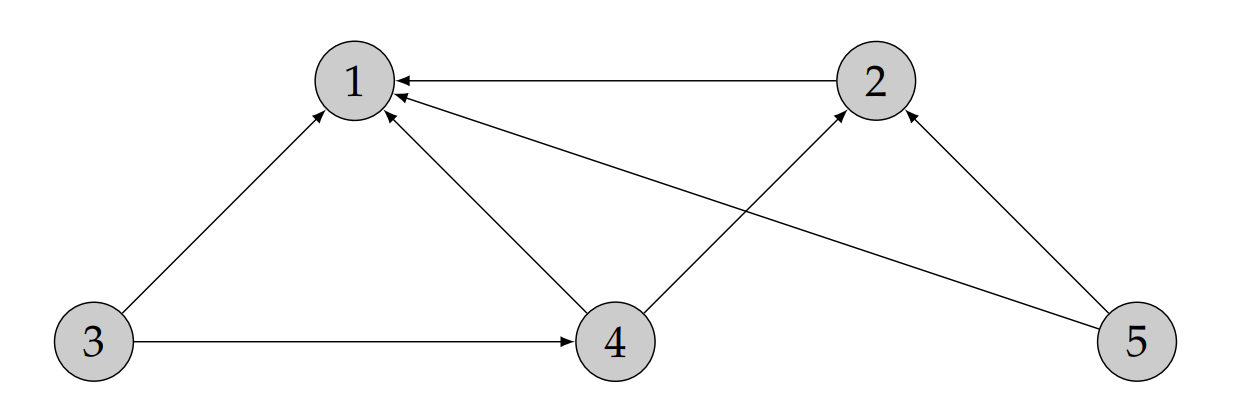


In [131]:
B = np.array([
    [0,1,1,1,1],
    [0,0,0,1,1],
    [0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0]
])

b = score (B,1e-6)
sum = 0 
for i in range (len(b)):
    print (i+1,": ",b[i])
    sum += b[i]
print("somme ",sum)

1 :  0.0
2 :  0.0
3 :  0.0
4 :  0.0
5 :  0.0
somme  0.0


##### 2.  En utilisant cette matrice de transition (avec α = 0, 85), calculer les scores de chacune des pages du graphe precedent. Commenter. On verifiera que le vecteur de score obtenu est bien approximativement solution de r = Pr

In [132]:
def matriceAmortie(C:np.array,alpha) -> np.array:
    """ 
    C = matrice d'adjacence déjà transposé
    alpha = facteur d'amortissement
    Renvoi une matrice P qui est la matrice de transition de C
    """
    Q = stocastique(C)                                                      # calcul de la stocastique de C dans Q
    sum_col = Q.sum(axis=0)                                                 # somme de chaque colonne de Q dans sum_col
    P = np.where(sum_col==0 ,1/C.shape[0],alpha * Q + (1-alpha)/C.shape[0]) # mettre la somme de toutes les colonnes à 1  
    return P


In [ ]:
def score_amortie(C:np.array,precision,alpha= 0.85):
    P = matriceAmortie(C,alpha)
    r = np.array([1/C.shape[0] for i in range(C.shape[0])])
    while (True):
        r_copie = r
        r = np.dot(P,r) # approximation du vecteur propre associé
        if ( np.allclose(r_copie, r, atol=precision)):
            return r

Q = np.array([
    [0.5, 0.5],
    [0.5, 0.5]
])
#q = score_amortie (Q,1e-6)
b = score_amortie(B,1e-6)
sum = 0 
for i in range (len(b)):
    print (i+1,": ",b[i])
    sum += b[i]
print("somme ",sum)

1 :  0.4549983465957759
2 :  0.209838894487212
3 :  0.09644959940606206
4 :  0.14226356010488828
5 :  0.09644959940606206
somme  1.0000000000000002


## Partie 3 : PageRank - version itérative, analyse

##### 1. Analyser l’influence du critere d’arret dans l’algorithme de la puissance iteree.

Dans l'algorithme de puissance itéré le critère d'arrêt permet de determiner à quel moment les changements entre deux derivées sont si faibles qu'ils sont négligablent. Plus le critere d'arret est petit plus l'algorithme sera precis sur le score des pages, le point négatif sera qu'il effectura beaucoup plus de calcul et sera donc plus lourd et plus long.

##### 2.Ajouter quelques hubs (pages qui ont beaucoup de liens sortant) et autorites (pages qui ont beaucoup de liens entrant). Commenter l’impact sur les scores


On se rend compte que si on ajoute un HUB, ici 15, qui pointe vers diverses autres noeuds mais qui n'est jamais pointé, alors son score sera très bas ce qui impact tres peu les scores des autres pages. 
A l'inverse ajouter une autortié, ici 16, qui est reférencé par une tres grande quantité d'autres noeuds changera les scores des page le referencant. Chaque page qui le pointe diminu son propre score et augmente celui de 16.     

In [134]:
C_bis = np.array([
    [0,1,1,1,1,0,1,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,1,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,1,1,0,1,0,0,0,0,0,1],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,1,0,1,1,1,1,0],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,0,1,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,1,0,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
])

b = score_amortie (C_bis,1e-6)
for i in range (len(b)):
    print (i+1,": ",b[i])

1 :  0.13852175956962967
2 :  0.02965263177209838
3 :  0.03904266557089346
4 :  0.048197984961137856
5 :  0.06257018263650169
6 :  0.15313065228525888
7 :  0.05245725959477616
8 :  0.10229081662680027
9 :  0.05245725959477616
10 :  0.13843652911400917
11 :  0.030269936479563105
12 :  0.03922217682388763
13 :  0.04826734701994402
14 :  0.06214946461739075
15 :  0.0033333333333333383


##### 3. Essayez d’accroître le score de certaines pages. Expliquez votre méthode et validez-la experimentalement

On a fait en sorte que chaque page soit pointée et pointe une autre page. Donc chaque page peut être accessible depuis toutes les pages. On a rajouté un lien de 6 à 10, de 6 à 1 et de 5 à 11.
6 étant la page la plus importante, elle a transmis son score aux pages 1 et 10 qui ont donc gagné en importance, au détriment de la page 6 qui en a perdu. La page 5 pointait uniquement vers la page 1 et transmet donc maintenant une partie de son importance à la page 11, tout en perdant un peu de son importance.

##### 4. Faites varier le facteur d’amortissement α pour analyser son influence. On rappelle que α ∈ [0, 1] 

Le facteur d'amortissement traduit le hasard de passer d'une page a l'autre. Plus le facteur d'amortissement est proche de 1 plus on considere que l'on peut se déplacer qu'entre deux pages ayant un lien. Alors que si le facteur d'amortiessent est 0 on considere que les liens n'ont aucunes instances sur le score de la page. 

In [135]:
t = score_amortie (C,1e-6,0)
for i in range (len(t)):
    print (i+1,": ",t[i])

1 :  0.07142857142857142
2 :  0.07142857142857142
3 :  0.07142857142857142
4 :  0.07142857142857142
5 :  0.07142857142857142
6 :  0.07142857142857142
7 :  0.07142857142857142
8 :  0.07142857142857142
9 :  0.07142857142857142
10 :  0.07142857142857142
11 :  0.07142857142857142
12 :  0.07142857142857142
13 :  0.07142857142857142
14 :  0.07142857142857142


In [136]:
t = score_amortie (C,1e-6,1)
for i in range (len(t)):
    print (i+1,": ",t[i])

1 :  0.13761783539830247
2 :  0.027523733949253455
3 :  0.03669838652216148
4 :  0.04587309429687282
5 :  0.059635154836846296
6 :  0.16513143092381713
7 :  0.05504320270122657
8 :  0.11008575366685683
9 :  0.05504320270122657
10 :  0.13761783539830247
11 :  0.02752373394925345
12 :  0.03669838652216147
13 :  0.04587309429687281
14 :  0.05963515483684628


## Partie 4 : PageRank - version itérative, analyse

##### 1. En utilisant le logiciel d’exploration de site web present sur la page Ametice, construire trois matrices de votre choix et appliquez l’algorithme de PageRank a ces matrices. L’ordre de ces matrices sera compris entre 10 et 30. Ces matrices, le resultat du logiciel d’exploration ainsi que le site web choisi apparaıtront clairement dans le dossier.

Après avoir tester un grand nombre de site web nous avons trouver pertinant de choisir le site de base de donnée en ligne de supabase (supabase.com), car chaque page trouvé dans celle ci ont des scores plus ou moins différents. On choisit de faire une matrice de 10, 20,puis 30. 

Pour l'interpretation de nos ressultats nous implementons une fonction qui renvoi une liste decroissant du score de chacun des noeuds, ainsi la valeur à l'indice 0 nous donnera la page la mieux referencé par PageRank  

In [ ]:
"""le logiciel fournit renvoi une matrice d'adjacence, 
il faut donc la transposé grace à la méthode .T"""
supabase10 = np.array([
    [1,1,1,0,1,0,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1],
    [1,1,1,1,1,0,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1],
    [1,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,1],
    [1,1,1,0,1,0,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1]
])

#supabase10 = np.array([
#    [0,0,0,0,0,0,0,0,0,0],
#    [1,0,0,0,1,0,0,0,0,0],
#    [1,0,0,0,1,0,0,0,0,0],
#    [1,0,0,0,1,0,0,0,0,0],
#    [1,0,0,0,1,0,0,0,0,0],
#    [0,1,1,1,0,1,1,1,0,1],
#    [0,1,1,1,0,1,1,1,0,1],
#    [0,1,1,1,0,1,1,1,0,1],
#    [0,1,1,1,0,1,1,1,0,1],
#    [0,1,1,1,0,1,1,1,0,1]
#])  #linkedin
print(supabase10.T, "\n")               # Affichage de la transposé 
t = score_amortie (supabase10.T,1e-6)   # Affichage des scores des pages 
for i in range (len(t)):
    print (i+1,": ",t[i])

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [0 0 0 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 0 0 1 1]
 [1 1 1 1 1 1 0 1 1 1]] 

1 :  0.2265314056434824
2 :  0.09994043507199435
3 :  0.13158817771486636
4 :  0.005590063566812923
5 :  0.09994043507199435
6 :  0.005000000000000004
7 :  0.09994043507199435
8 :  0.09994043507199435
9 :  0.09994043507199434
10 :  0.13158817771486636


In [138]:

supabase20 = np.array([
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1]
])

print(len(supabase20[0])==supabase20.shape[0])

t = score_amortie (supabase20,1e-6)

for i in range (len(t)):
    print (i+1,": ",t[i])

True
1 :  0.032458989941829386
2 :  0.032458989941829386
3 :  0.0873878187565218
4 :  0.11662520212798005
5 :  0.032458989941829386
6 :  0.04418156694296869
7 :  0.004122988037287153
8 :  0.017625279890069807
9 :  0.032458989941829386
10 :  0.032458989941829386
11 :  0.032458989941829386
12 :  0.032458989941829386
13 :  0.032458989941829386
14 :  0.032458989941829386
15 :  0.006033676633729126
16 :  0.08637851162699585
17 :  0.08637851162699585
18 :  0.08637851162699585
19 :  0.08637851162699585
20 :  0.08637851162699585


In [139]:
supabase30 = np.array([
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1], 
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],   
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]
])

print(len(supabase30[0])==supabase30.shape[0])

t = score_amortie (supabase30,1e-6)

for i in range (len(t)):
    print (i+1,": ",t[i])

True
1 :  0.014435010979680422
2 :  0.014435010979680422
3 :  0.014435010979680422
4 :  0.08372404775649393
5 :  0.014435010979680422
6 :  0.01994104862952021
7 :  0.0027553001553022793
8 :  0.007197807551643513
9 :  0.014435010979680422
10 :  0.014435010979680422
11 :  0.014435010979680422
12 :  0.014435010979680422
13 :  0.014435010979680422
14 :  0.014435010979680422
15 :  0.0052483370776901335
16 :  0.06955130000972794
17 :  0.06955130000972794
18 :  0.06955130000972794
19 :  0.06955130000972794
20 :  0.06955130000972794
21 :  0.06955130000972794
22 :  0.06955130000972794
23 :  0.06955130000972794
24 :  0.06955130000972794
25 :  0.06955130000972794
26 :  0.014435010979680422
27 :  0.014435010979680422
28 :  0.0035620175231066285
29 :  0.004419154726398749
30 :  0.004419154726398749


##### 2. Sur la page Ametice vous trouverez les matrices du reseau routier (issues de OpenStreet Map) de differentes villes. Chaque groupe étudiera la matrice “413 Avenue Gaston Berger” ainsi que la ville qui lui a eté affectée.

In [140]:
Gaston_Berger = np.load("413 avenue Gaston Berger, Aix en Provence, France_Matrice.npy")

t = score_amortie (Gaston_Berger,1e-6)

for i in range (len(t)):
    print (i+1,": ",t[i])

print(type(t))
print(t.shape)
t = t.reshape(-1,1)
print(t.shape)


1 :  0.0005037310222943616
2 :  0.0006008486986175379
3 :  0.00032208056846373407
4 :  0.000692918584686147
5 :  0.000878695434636745
6 :  0.0009643443237075833
7 :  0.0005294398629062024
8 :  0.001464043246314975
9 :  0.0007896473753185544
10 :  0.0006895187907505057
11 :  0.0006148928157768339
12 :  0.0007488721831247172
13 :  0.00022069508599387145
14 :  0.0010242757039354569
15 :  0.0008547041103989729
16 :  0.0007967700529036923
17 :  0.0007710947379370664
18 :  0.0005389185000938697
19 :  0.0008256873096937087
20 :  0.0005118422471456918
21 :  0.00014802028179352627
22 :  0.0014096867419377663
23 :  0.0008828153775957163
24 :  0.0007411868660206089
25 :  0.0005049317830662792
26 :  0.0008355320797937503
27 :  0.0008438594544626632
28 :  0.000842806902516297
29 :  0.000840906850907797
30 :  0.0008420506880713136
31 :  0.0008577110860631427
32 :  0.00048391907775301835
33 :  0.0004639217223432729
34 :  0.0010022305961769635
35 :  0.0006917068700104986
36 :  0.0007975862455706694
37

In [141]:
M = np.load("413 avenue Gaston Berger, Aix en Provence, France_Id_Noeud.npy")
print(M)
print(M.shape[0])
print(len(M))
print(M[0])
print(type(M[1]))

[  12156118   12156297   12156309 ... 9406109696 9481625757 9501232881]
1259
1259
12156118
<class 'numpy.int64'>


In [142]:

supabase20 = np.array([
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [0,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1]
])

print(len(supabase20[0])==supabase20.shape[0])

t = score_amortie (supabase20,1e-6)

for i in range (len(t)):
    print (i+1,": ",t[i])

True
1 :  0.032458989941829386
2 :  0.032458989941829386
3 :  0.0873878187565218
4 :  0.11662520212798005
5 :  0.032458989941829386
6 :  0.04418156694296869
7 :  0.004122988037287153
8 :  0.017625279890069807
9 :  0.032458989941829386
10 :  0.032458989941829386
11 :  0.032458989941829386
12 :  0.032458989941829386
13 :  0.032458989941829386
14 :  0.032458989941829386
15 :  0.006033676633729126
16 :  0.08637851162699585
17 :  0.08637851162699585
18 :  0.08637851162699585
19 :  0.08637851162699585
20 :  0.08637851162699585


In [143]:
supabase30 = np.array([
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1], 
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],   
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]
])

print(len(supabase30[0])==supabase30.shape[0])

t = score_amortie (supabase30,1e-6)

for i in range (len(t)):
    print (i+1,": ",t[i])

True
1 :  0.014435010979680422
2 :  0.014435010979680422
3 :  0.014435010979680422
4 :  0.08372404775649393
5 :  0.014435010979680422
6 :  0.01994104862952021
7 :  0.0027553001553022793
8 :  0.007197807551643513
9 :  0.014435010979680422
10 :  0.014435010979680422
11 :  0.014435010979680422
12 :  0.014435010979680422
13 :  0.014435010979680422
14 :  0.014435010979680422
15 :  0.0052483370776901335
16 :  0.06955130000972794
17 :  0.06955130000972794
18 :  0.06955130000972794
19 :  0.06955130000972794
20 :  0.06955130000972794
21 :  0.06955130000972794
22 :  0.06955130000972794
23 :  0.06955130000972794
24 :  0.06955130000972794
25 :  0.06955130000972794
26 :  0.014435010979680422
27 :  0.014435010979680422
28 :  0.0035620175231066285
29 :  0.004419154726398749
30 :  0.004419154726398749


##### 2. Sur la page Ametice vous trouverez les matrices du reseau routier (issues de OpenStreet Map) de differentes villes. Chaque groupe étudiera la matrice “413 Avenue Gaston Berger” ainsi que la ville qui lui a eté affectée.

In [144]:
def classement(noeud:np.array,score:np.array):
    corres = {}
    for i in range(len(noeud)):
        corres[noeud[i]] = score[i]
    sorted_corres = dict(sorted(corres.items(), key=lambda item: item[1],reverse=True))
    return list(sorted_corres.keys())


In [145]:
Gaston_Berger = np.load("413 avenue Gaston Berger, Aix en Provence, France_Matrice.npy")
Gaston_Berger = Gaston_Berger.T
id_Gaston_Berger = np.load("413 avenue Gaston Berger, Aix en Provence, France_Id_Noeud.npy")
score = score_amortie(Gaston_Berger,1e-6)
t = classement(id_Gaston_Berger,score)

for i in range(len(t)):
    print(f"{i+1} : {t[i]} : https://www.openstreetmap.org/node/{t[i]}") 


1 : 5672603788 : https://www.openstreetmap.org/node/5672603788
2 : 1840330051 : https://www.openstreetmap.org/node/1840330051
3 : 9196449217 : https://www.openstreetmap.org/node/9196449217
4 : 1840330044 : https://www.openstreetmap.org/node/1840330044
5 : 310848784 : https://www.openstreetmap.org/node/310848784
6 : 302864793 : https://www.openstreetmap.org/node/302864793
7 : 304010763 : https://www.openstreetmap.org/node/304010763
8 : 303994494 : https://www.openstreetmap.org/node/303994494
9 : 5323321826 : https://www.openstreetmap.org/node/5323321826
10 : 34552857 : https://www.openstreetmap.org/node/34552857
11 : 1837997824 : https://www.openstreetmap.org/node/1837997824
12 : 5661391308 : https://www.openstreetmap.org/node/5661391308
13 : 4836722465 : https://www.openstreetmap.org/node/4836722465
14 : 259968383 : https://www.openstreetmap.org/node/259968383
15 : 7304213674 : https://www.openstreetmap.org/node/7304213674
16 : 302864436 : https://www.openstreetmap.org/node/302864436
1

Pour la première donné, nous pouvons observer qu'il y a une forte influence devant l'IUT Aix-Marseille. L'autoroute est juste à côté ce qui permet de venir beaucoup plus facilement en voiture, il y a de nombreux transport à proximité notament grâce au P+R Krypton et de nombreux étudiant y accède. Il y a également un logement universitaire ainsi qu'un restaurant et une bibliothèque universitaire juste à coté.
La seconde donnée à été supprimé il y a environ 2ans ce qui est étrange étant donné que nous avons toujours accès à la carte bien que le point n'est plus disponible. Cette donnée à été choisi pour montrer que plusieurs d'autre lien ont également ce même problème.
La donnée numéro 4 est à coté d'une fontaine un peu écarté de la route. Il y a un collège ainsi qu'un hôtel à proximité. Etant donné que c'est dans le centre ville et que c'est une petite rue. Il y est facile d'y accéder à pied.
La dernière donnée choisie est la numéro 1257. A coté de la Cour d'Appel et du Palais de Justice. Autour, il y a plusieurs magasins de vêtement ce qui favorise l'influence. L'acc-s en voiture est cependant assez difficile. 

Nous avons choisi 4 données qui sont très différente entre elles pour un meilleur visuel ainsi qu'avoir quelque donnée pertinente. En utilisant ses données, nous pouvons vérifiez si la matrice est bonne à Aix en Provence.

In [146]:
Paris = np.load("Paris, France_Matrice.npy")
Paris = Paris.T
id_Paris = np.load("Paris, France_Id_Noeud.npy")
score = score_amortie(Paris,1e-6)
t = classement(id_Paris,score)

for i in range(len(t)):
    print(f"{i} : {t[i]} : https://www.openstreetmap.org/node/{t[i]}") 

0 : 24966020 : https://www.openstreetmap.org/node/24966020
1 : 971501937 : https://www.openstreetmap.org/node/971501937
2 : 178763582 : https://www.openstreetmap.org/node/178763582
3 : 6638599300 : https://www.openstreetmap.org/node/6638599300
4 : 243507564 : https://www.openstreetmap.org/node/243507564
5 : 34909027 : https://www.openstreetmap.org/node/34909027
6 : 34909043 : https://www.openstreetmap.org/node/34909043
7 : 94258877 : https://www.openstreetmap.org/node/94258877
8 : 14798304 : https://www.openstreetmap.org/node/14798304
9 : 34845763 : https://www.openstreetmap.org/node/34845763
10 : 25668541 : https://www.openstreetmap.org/node/25668541
11 : 116118801 : https://www.openstreetmap.org/node/116118801
12 : 24966021 : https://www.openstreetmap.org/node/24966021
13 : 24965981 : https://www.openstreetmap.org/node/24965981
14 : 25580452 : https://www.openstreetmap.org/node/25580452
15 : 470142 : https://www.openstreetmap.org/node/470142
16 : 34845761 : https://www.openstreetmap.

Nous pouvons voir que le point avec le score le plus élevé est dans le boulevard Malesherbes, proche de l'Église de la Madeleine, de l'Opéra, de la Gare Saint-Lazare, de la place la Concorde et et les Champs-Élysées.
Le deuxième point est dans la rue Mayran juste à côté de la rue La Fayette